# <font color=darkblue>Machine Learning Project: Churn Prediction </font>


**Goals:**
* Implementing different customer churn prediction models using Telco dataset
* Comparing the different models   
* Presenting the most efficient model

**Team Members:**
* Manel Fares    
* Rahma Aouini
* Ami Samira Ouedraogo
* Hanene Ennine
* Nesrine Benabdkarim
* Mstapha Bersellous



In [751]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE, RFECV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, accuracy_score, average_precision_score, precision_recall_fscore_support)
import mlxtend
import warnings
warnings.filterwarnings('ignore')

# <font color=red>Loading the dataset </font>


To import the dataset we will use Pandas library and we will store the data in Pandas Dataframe

In [752]:
data = pd.read_csv("Telco_customer_churn.csv")
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


Befor We start working on our dataset there is 5 columns that we should remove
* The CustomerID represent unique values
* The Churn Label and Churn Value are equivalent and both represent the target so we will remove Churn Label
* Churn Score, CLTV and Churn Reason are added colunms used for unsupervised learning 



In [753]:
data= data.drop(['CustomerID','Churn Label','Churn Score','CLTV','Churn Reason'], axis=1)

# <font color=red>Data Understanding</font>


Visualizing the dataframe shape

In [754]:
data.shape

(7043, 28)

* Our dataset has 7043 Rows and 28 columns

Describing all columns of the dataset regardless of data type

In [755]:
data.describe(include = 'all')

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
count,7043.0,7043,7043,7043,7043.000000,7043,7043.000000,7043.000000,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043.000000
unique,NaN,1,1,1129,NaN,1652,NaN,NaN,2,2,...,3,3,3,3,3,2,4,NaN,6531,NaN
top,NaN,United States,California,Los Angeles,NaN,"33.3249, -114.758334",NaN,NaN,Male,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,NaN
freq,NaN,7043,7043,305,NaN,5,NaN,NaN,3555,5901,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,NaN
mean,1.0,NaN,NaN,NaN,93521.964646,NaN,36.282441,-119.798880,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,0.265370
std,0.0,NaN,NaN,NaN,1865.794555,NaN,2.455723,2.157889,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,0.441561
min,1.0,NaN,NaN,NaN,90001.000000,NaN,32.555828,-124.301372,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,0.000000
25%,1.0,NaN,NaN,NaN,92102.000000,NaN,34.030915,-121.815412,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,0.000000
50%,1.0,NaN,NaN,NaN,93552.000000,NaN,36.391777,-119.730885,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,0.000000
75%,1.0,NaN,NaN,NaN,95351.000000,NaN,38.224869,-118.043237,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,1.000000


Visualizing informations about the data

In [756]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Count              7043 non-null   int64  
 1   Country            7043 non-null   object 
 2   State              7043 non-null   object 
 3   City               7043 non-null   object 
 4   Zip Code           7043 non-null   int64  
 5   Lat Long           7043 non-null   object 
 6   Latitude           7043 non-null   float64
 7   Longitude          7043 non-null   float64
 8   Gender             7043 non-null   object 
 9   Senior Citizen     7043 non-null   object 
 10  Partner            7043 non-null   object 
 11  Dependents         7043 non-null   object 
 12  Tenure Months      7043 non-null   int64  
 13  Phone Service      7043 non-null   object 
 14  Multiple Lines     7043 non-null   object 
 15  Internet Service   7043 non-null   object 
 16  Online Security    7043 

int64, float64 and object are the data types of our features.
* 21 features are of type object 
* 7 features are numeric

TotalCharges is detected as object we shoudl convert it to numeric <br>


In [757]:
totalCharges = data.columns.get_loc("Total Charges")
new_col = pd.to_numeric(data.iloc[:, totalCharges], errors='coerce')
#coerce: the invalid parsing will be set as NaN
data.iloc[:, totalCharges] = pd.Series(new_col)


### Data Visualization

Visualizing Total Customer Churn

In [759]:
import plotly.offline as po
import plotly.graph_objs as go


plot_by_churn_labels = data["Churn Value"].value_counts().keys().tolist()
plot_by_churn_values = data["Churn Value"].value_counts().values.tolist()

plot_data= [
    go.Pie(labels = plot_by_churn_labels,
           values = plot_by_churn_values,
           marker = dict(colors =  [ 'Teal' ,'Grey'],
                         line = dict(color = "white",
                                     width =  1.5)),
           rotation = 90,
           hoverinfo = "label+value+text",
           hole = .6)
]
plot_layout = go.Layout(dict(title = "Customer Churn",
                   plot_bgcolor  = "rgb(243,243,243)",
                   paper_bgcolor = "rgb(243,243,243)",))


fig = go.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

we have 5174 rows with Churn Value equal to 0 (73,5%) => no churners  <br>
we have 1869 rows with Churn Value equal to 1 (26,5%) => churners  <br>

In [760]:
retained = data[data['Churn Value'] == 0]
churned = data[data['Churn Value'] == 1]
num_retained = retained.shape[0]
num_churned = churned.shape[0]

print( num_retained / (num_retained + num_churned) * 100 , "% of customers that stayed .")

print( num_churned / (num_retained + num_churned) * 100,"% of customers that left.")


73.4630129206304 % of customers that stayed .
26.536987079369588 % of customers that left.


Deviding the features into categorical features and numerical features

In [761]:
categorical_features =[]
num =[]

for col in data.columns:
    if data[col].dtypes == 'object':
        categorical_features.append(col)
    else:
        num.append(col)



Visualizing data for categorical features

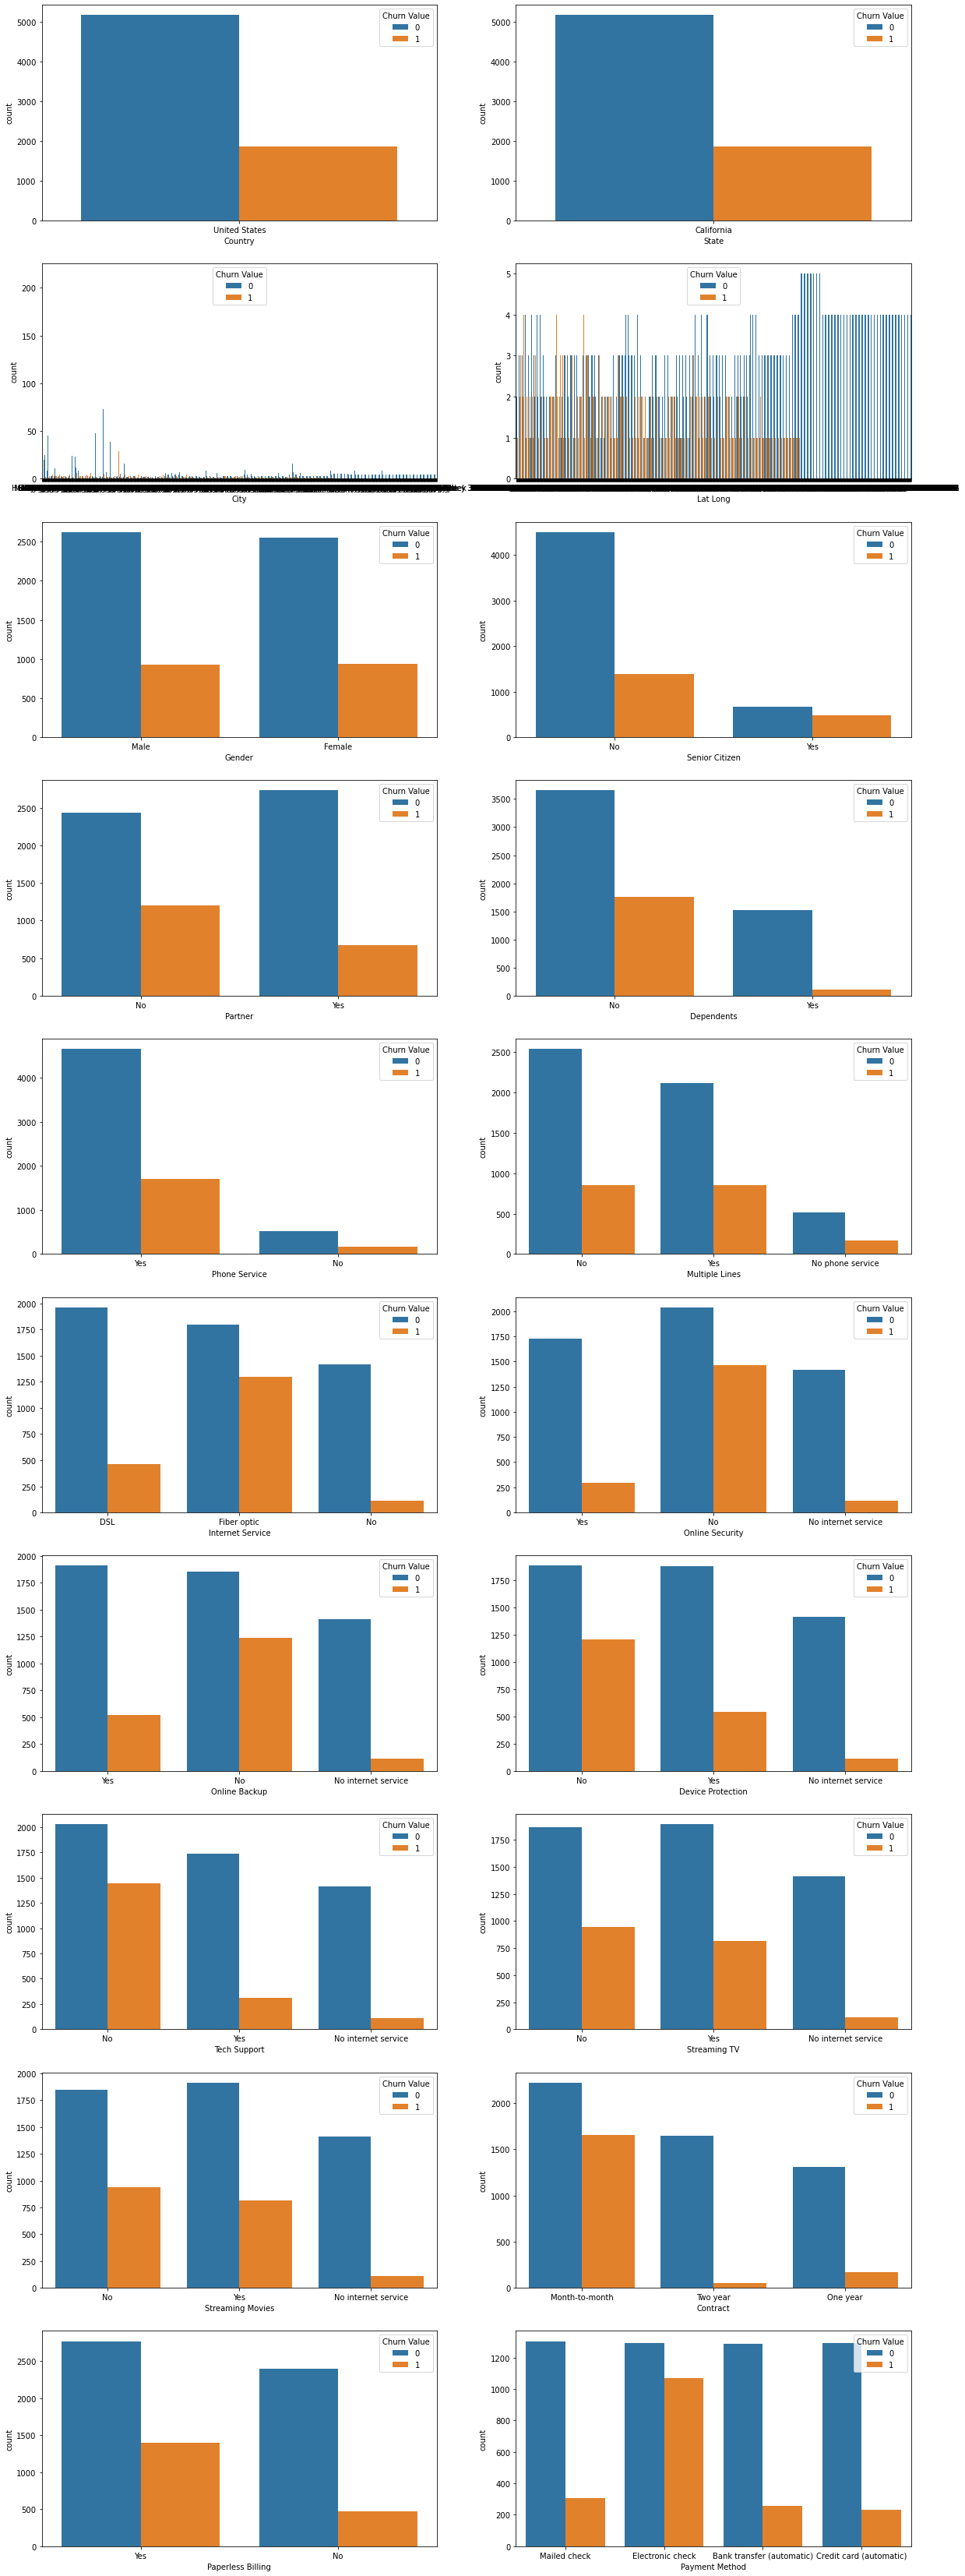

In [138]:

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14), (ax15,ax16), (ax17, ax18),(ax19, ax20)) = plt.subplots(10, 2, figsize=(20, 60))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18, ax19, ax20]

for i in range(len(categorical_features)):
    sns.countplot(x = categorical_features[i], hue="Churn Value", data=data, ax=ax[i])

### Interpretation :
We can see that :
* for the Count, Country and State features we have only the value 1, "United States" and "California" respectively so this features won't give us useful informations for the model so we should delete them.
* for the City and Lat Long features have many duplicated values so this features won't be good for classification model"
* for the gender feature, we have relatively equal rates of churn by gender so we can delete this feature
* for the Contract feature, we have higher churn for those who have "Month-to-Month" contract
* for the Payement Method feature, we have higher churn for those who use "Bank transfer(automatic)" method
* for the InternetService feature, we have higher churn for those that have "Fiber optic" service 
* Customers with no "partner" are most likely to leave
* Customers with dependents are not leaving unlike customers without dependents


Visualizing data for numerical features

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024AD9813E20>,
      dtype=object)

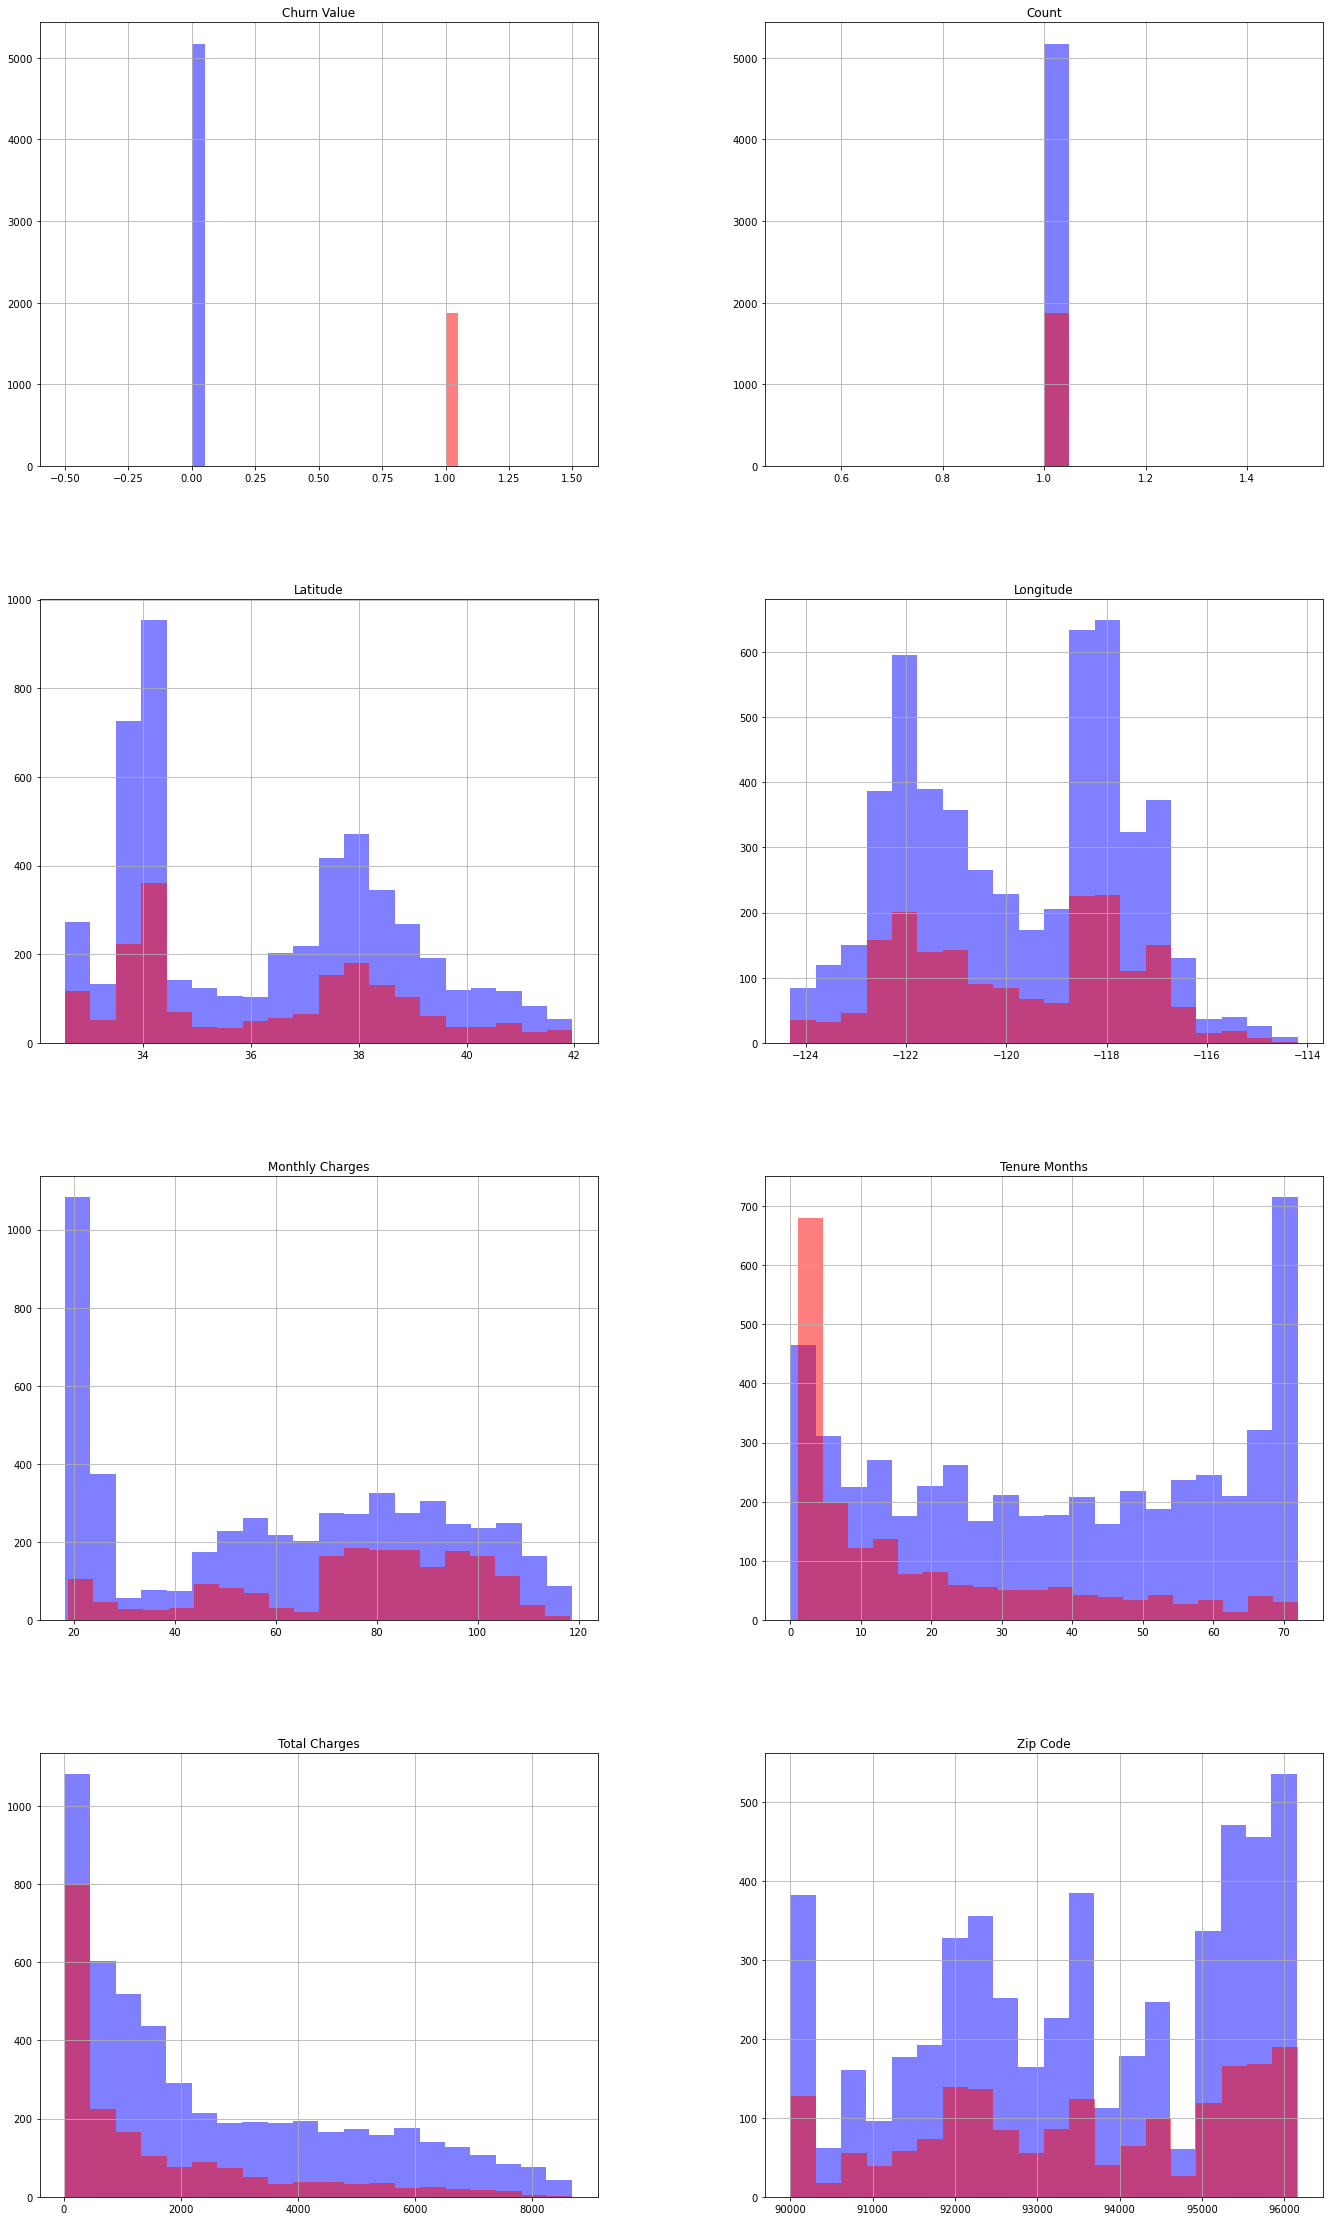

In [762]:
# Continuous feature histograms.
fig, ax = plt.subplots(4,2, figsize=(23, 40))
data[data['Churn Value'] == 0][num].hist(bins=20, color="blue", alpha=0.5, ax=ax)
data[data['Churn Value'] == 1][num].hist(bins=20, color="red", alpha=0.5, ax=ax)


### Interpretation :
We can see that:
* for the Count feature, we have only one value equal to 1, so this feature should be deleted.
* for the Monthly Charges feature, customers that churn tend to pay higher monthly fees than those that stay.
* for the tenure feature,most of the customers that churned had between 1 and 8 months with the company, while most of the retained customers had a tenure between 50 and 72 months. So customers that churn tend to be relatively new customers.

# <font color=red>Data Preprocessing</font>


### Sparseness Elimination


Searching for the columns having missing values

In [763]:
print(data.isnull().values.any())
data.isnull().sum()

True


Count                 0
Country               0
State                 0
City                  0
Zip Code              0
Lat Long              0
Latitude              0
Longitude             0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Value           0
dtype: int64

We see that the Total Charges column has 11 missing values. There are various ways to handle this issue:

Drop rows with missing values, fill in the missing value with one of the following strategies: Most fequent values, zero, Mean of the values, Random value, etc).<br>

In our case we will remove the rows with the missing values because it's only 11 missing values it won't affect the dataset

In [764]:
print(data.shape)
data = data.dropna(axis=0, subset=['Total Charges'])
print(data.shape)


(7043, 28)
(7032, 28)


### Outliers Detection


The presence of outliers in the dataset can result in a poor fit and lower the predictive modeling performance.

We are going to create a function called diagnostic_plots to visialise the feautres distribution which takes as parameters the dataset and the feature to plot

* distplot: Depicts the variation in the data distribution
* probplot: Generates a probability plot of sample data against the quantiles of a specified theoretical distribution
* boxplot: A method to graphically show the spread of a numerical variable through quartiles

In [765]:
import scipy.stats as stats
def diagnostic_plots(df, variable):

    plt.figure(figsize=(16, 4))

    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.show()

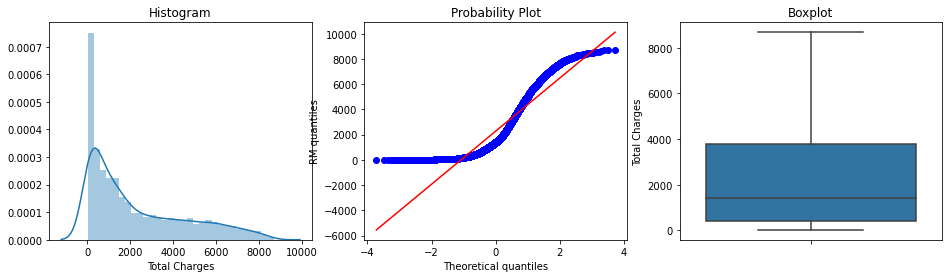

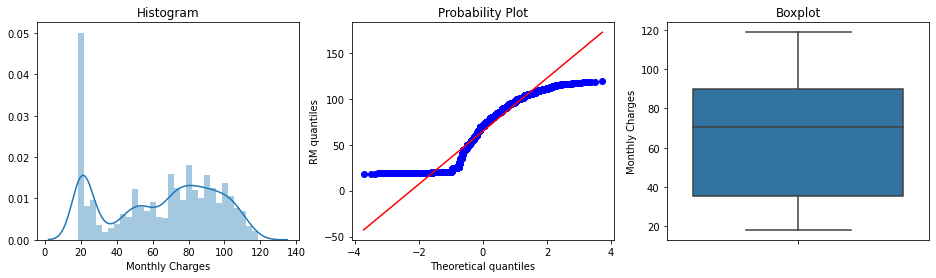

In [766]:
diagnostic_plots(data, 'Total Charges')
diagnostic_plots(data, 'Monthly Charges')

### Interpretation :
Both the Total Charges feature and Monthly Charges features haven't any outliers values also we can conclude that they doesn't have a normal (Gaussian) distribution

We are going to use quartile method to confirm that we don't have outliers in our dataset

In [767]:
#Total charges
quartile_1, quartile_3 = np.percentile(data["Total Charges"], [25, 75])
print('Total Charges :')
print('Quartile 1 : ',quartile_1)
print('Quartile 3 : ',quartile_3)
IQR = quartile_3 - quartile_1
lower_bound = quartile_1 - (IQR * 1.5)
upper_bound = quartile_3 + (IQR * 1.5)
print(np.where((data["Total Charges"] < lower_bound) | data["Total Charges"] > upper_bound))

#Monthly Charges
quartile_1, quartile_3 = np.percentile(data["Monthly Charges"], [25, 75])
IQR = quartile_3 - quartile_1
lower_bound = quartile_1 - (IQR * 1.5)
upper_bound = quartile_3 + (IQR * 1.5)
print('\nMonthly Charges :')
print('Quartile 1 : ',quartile_1)
print('Quartile 3 : ',quartile_3)
print(np.where((data["Monthly Charges"] < lower_bound) | data["Monthly Charges"] > upper_bound))

Total Charges :
Quartile 1 :  401.45
Quartile 3 :  3794.7375
(array([], dtype=int64),)

Monthly Charges :
Quartile 1 :  35.587500000000006
Quartile 3 :  89.86249999999998
(array([], dtype=int64),)


As we can see we have two empty arrays for Total Charges and Monthly Charges so it's mean we don't have outliers in this 2 features

### Features Selection


Searching for the unique values of each features

In [768]:
print("Unique values (per feature): \n{}\n".format(data.nunique()))

Unique values (per feature): 
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          72
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1584
Total Charges        6530
Churn Value             2
dtype: int64



Based on the interpretations of data Visualization and the unique values we are going to remove the following features :<br>
Country, State, Count  Gender, Lat Long, City, Zip Code, Lat Long, Latitude and Longitude

In [769]:
data = data.drop(['Country','State','Count','Gender','Lat Long','City','Zip Code','Lat Long','Latitude','Longitude'], axis=1)

In [770]:
data.shape

(7032, 19)

Now our dataset hax 7032 rows and 19 columns

### Splitting the data into training and test sets

In [771]:
y = data.iloc[:,18]
X = data.iloc[:,0:18]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

 ### <font color=red>Note</font>
 * Any modification in the values of the dataset should be done only for the Train set values ! we mustn't change the test set !

### Data Encoding 

Machine learning models require all input and output variables to be numeric.
This means we must encodeall the categorical feautres to numbers before we can fit and evaluate the models.

Creating a list of the categorical features

In [772]:
categorical_features =data.select_dtypes(include=['object']).columns

Encoding the categorical features using Ordinal Encoder

In [773]:
encoder= OrdinalEncoder()
X_train[categorical_features]=encoder.fit_transform(X_train[categorical_features])
X_test[categorical_features]=encoder.transform(X_test[categorical_features])


### Data Standardisation

Standardization refers to shifting the distribution of each attribute to have a mean of 0 and a standard deviation of 1.
Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn.
the estimators might behave badly if the individual features do not more or less look like standard normally distributed data

Creating a list of the numerical features

In [774]:
Lnum = data.select_dtypes(include=['int64', 'float64']).columns
Lnum


Index(['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value'], dtype='object')

Deleting the target from the list

In [775]:
LnumX=Lnum.delete(3)
LnumX

Index(['Tenure Months', 'Monthly Charges', 'Total Charges'], dtype='object')

Standardisation with StandardScaler

In [776]:
scaler=StandardScaler()
X_train[LnumX]=scaler.fit_transform(X_train[LnumX])
X_test[LnumX]=scaler.transform(X_test[LnumX])

StandardScaler standardize the features by removing the mean and scaling to unit variance

# <font color=red>Modeling and Evaluation  </font>

In this phase we are going to use suprvised learning algorithms for classification<br>
We start by searching the best parameters for each classifier using Grid Search. Then we evaluate the model using scoring, confusion matrix, etc and based on the evaluation, we try to improve the model using feature selection methods.


# <font color=purpuple>Gradient Boost Classifier</font>


Creating a copy of the train set and test set 

In [246]:
X_train_Gboost,y_train_Gboost,X_test_Gboost,y_test_Gboost= X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()

Searching for the best parameters

In [155]:
Gbc=GradientBoostingClassifier(n_estimators=100)

param_grid={'loss' : ['deviance', 'exponential'],
            'criterion' : ['friedman_mse', 'mse', 'mae'],
            'max_features' : ['auto', 'sqrt', 'log2']}
grid=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=5)
grid.fit(X_train_Gboost, y_train_Gboost)
grid.best_score_
grid.best_params_

{'criterion': 'friedman_mse', 'loss': 'deviance', 'max_features': 'sqrt'}

Display the best score

In [156]:
grid.best_score_

0.8122666666666667

Creating the model using the best parameters for Gradient Boosting Classifier

In [247]:
final_Gbc=GradientBoostingClassifier(criterion= 'friedman_mse', loss= 'deviance', max_features= 'sqrt')
final_Gbc.fit(X_train_Gboost, y_train_Gboost)

GradientBoostingClassifier(max_features='sqrt')

Displaying the train score and the test score 

In [248]:
train_score_gb = final_Gbc.score(X_train_Gboost,y_train_Gboost)
test_score_gb = final_Gbc.score(X_test_Gboost,y_test_Gboost)

print('train score=', train_score_gb )
print('test score=', test_score_gb )

train score= 0.8291555555555555
test score= 0.798862828713575


### Classification report

In [249]:
ypred1 =final_Gbc.predict(X_test_Gboost)
print(classification_report(y_test_Gboost, ypred1))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.64      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



### Confusion matrix visualization

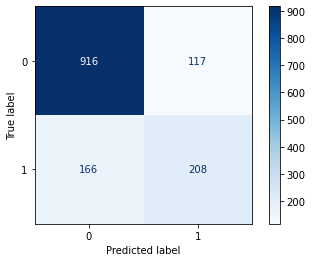

In [250]:
plot_confusion_matrix(final_Gbc, X_test_Gboost, y_test_Gboost,cmap=plt.cm.Blues)  
plt.show()


### Features importance visualization

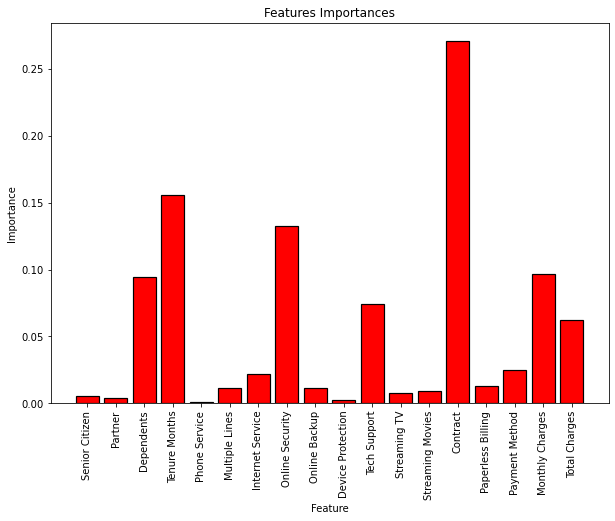

In [251]:
plt.figure(figsize=(10,7))
feature_list=X_train_Gboost.columns
importances = list(final_Gbc.feature_importances_)
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances');

We can see that the partner, Phone service and Device Protection features has the lowest impotance comparing to others 

In [166]:
X_train_Gboost,y_train_Gboost,X_test_Gboost,y_test_Gboost= X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()

In [258]:
X_train_Gboost,y_train_Gboost,X_test_Gboost,y_test_Gboost= X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()

### Feature Selection using RFECV

In [172]:
X_train_Gboost,y_train_Gboost,X_test_Gboost,y_test_Gboost= X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()

In [259]:
selector = RFECV(final_Gbc,
                 step=1,
                 min_features_to_select=9,
                 cv=10)
selector.fit(X_train_Gboost, y_train_Gboost)
selector.grid_scores_


array([0.80603813, 0.80443765, 0.8094167 , 0.80852892, 0.81048463,
       0.81155003, 0.81226273, 0.81155003, 0.81066035, 0.81137494])

This array indicates the score of Gradient Boosting classifier at each iteration 

In [260]:
selector.ranking_

array([1, 1, 1, 1, 4, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1])

This array gave us the ranking of each features. The feature having rank 1 have high importance 

Display Selected features

In [261]:
feature_support = selector.get_support()
gb_feature = X_train_Gboost.loc[:,feature_support].columns.tolist()
gb_feature

['Senior Citizen',
 'Partner',
 'Dependents',
 'Tenure Months',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Tech Support',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Monthly Charges',
 'Total Charges']

Changing the X_train and X_test set according to the new features

In [262]:
X_train_Gboost=X_train_Gboost[gb_feature]
X_test_Gboost=X_test_Gboost[gb_feature]

In [333]:
X_train_Gboost.shape

(5625, 15)

Displaying the train score and the test score after features selection

In [263]:
final_Gbc.fit(X_train_Gboost, y_train_Gboost)
print('train score')
print('before=', train_score_gb, '  After=', final_Gbc.score(X_train_Gboost,y_train_Gboost))

print('test score')
print('Befor=',test_score_gb,'  After=', final_Gbc.score(X_test_Gboost,y_test_Gboost))

train score
before= 0.8291555555555555   After= 0.8252444444444444
test score
Befor= 0.798862828713575   After= 0.8088130774697939


### Classification report after feature selection

In [264]:
ypred =final_Gbc.predict(X_test_Gboost)
print(classification_report(y_test_Gboost, ypred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.66      0.57      0.62       374

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.80      0.81      0.80      1407



### Conclusion :
After the feature selection using RFECV the train score decrease a little bit but the test score,the accuarcy, the recall and the precision have improved



# <font color=purpuple>xgBoost </font>


Creating a copy of the train set and test set

In [298]:
X_train_xgb,y_train_xgb,X_test_xgb,y_test_xgb = X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()

Searching for the best parameters

In [41]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

grid_search.fit(X_train_xgb,y_train_xgb)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    5.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   23.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  2.1min
[Parallel(n_jobs=10)]: Done 960 out of 960 | elapsed:  2.8min finished


[13:07:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=42,
                                     subsample=No

Display best parameters

In [42]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 140}

Display best score (scoring = 'roc_auc' )

In [43]:
grid_search.score(X_test_xgb, y_test_xgb)

0.8458179540407205

In [44]:
grid_search.score(X_train_xgb, y_train_xgb)

0.8804562423574951

Creating the model using the best parameters

In [299]:
xgboost=XGBClassifier(
    learning_rate= 0.1 ,n_estimators= 140,max_depth= 2
)
xgboost.fit(X_train_xgb, y_train_xgb)

[15:18:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=140, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Displaying the train score and the test score 

In [300]:
print('train score  =', xgboost.score(X_train_xgb,y_train_xgb))
print('test score  =', xgboost.score(X_test_xgb,y_test_xgb))

train score  = 0.8250666666666666
test score  = 0.7974413646055437


### Classification report

In [301]:
ypred =xgboost.predict(X_test_xgb)
print(classification_report(y_test_xgb, ypred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



### Confusion matrix visualization

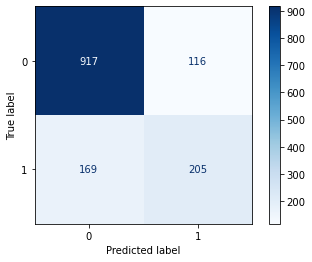

In [302]:
plot_confusion_matrix(xgboost, X_test_xgb, y_test_xgb,cmap=plt.cm.Blues)  
plt.show()

### Features importance visualization

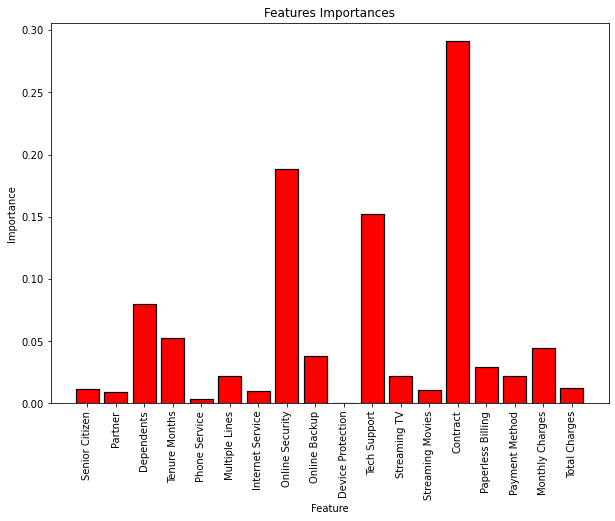

In [303]:
plt.figure(figsize=(10,7))
feature_list=X_train_xgb.columns
importances = list(xgboost.feature_importances_)
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances');

Device Protection has the lowest importance almost equal to 0 so we are going to remove this feature

### Feature Selection using RFECV

In [304]:
rfecv = RFECV(xgboost,step=1,
                 min_features_to_select=5,
                 cv=10)
rfecv.fit(X_train_xgb, y_train_xgb)

[15:18:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

RFECV(cv=10,
      estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.1,
                              max_delta_step=0, max_depth=2, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=140, n_jobs=8, num_parallel_tree=1,
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None),
      min_features_to_select=5)

In [305]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Display the selected features

In [314]:
feature_xgb = rfecv.get_support()
xgb_feature = X_train_xgb.loc[:,feature_xgb].columns.tolist()
print('Selected features :')
print(xgb_feature)
print('The number of features selected : ', len(xgb_feature))

Selected features :
['Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges']
The number of features selected :  18


We started by 18 feature and after the feature selectio using RFECV we obtained 18 features this mean that theren't any feature that we can remove which help us to improve the score of our model 


According to the features importances visualization Device Protection has almost 0 importance so we are going to delete it and see if this will affect the score of our model

In [315]:
X_train_xgb.drop(X_train_xgb.columns[[9]], axis = 1, inplace = True) 
X_test_xgb.drop(X_test_xgb.columns[[9]], axis = 1, inplace = True) 

In [332]:
X_train_xgb.shape

(5625, 17)

In [316]:
xgboost.fit(X_train_xgb, y_train_xgb)

[15:29:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=140, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Displaying the train score and the test score after feature selection

In [317]:
print('scores after removing Device protection feature')
print('train score =', xgboost.score(X_train_xgb,y_train_xgb))
print('test score =', xgboost.score(X_test_xgb,y_test_xgb))

scores after removing Device protection feature
train score = 0.8250666666666666
test score = 0.7974413646055437


### Classification report after feature selection

In [318]:
ypred =xgboost.predict(X_test_xgb)
print(classification_report(y_test_xgb, ypred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



### Conclusion :
Feature selection using RFECV doesn't help us to improve the model. There is no feature to remove so that the score will increase but by removing the feature Device protection which has almost 0 importance, the train score, test score, accuarcy, recall and the precision remain the same but it helps reducing the training Time. Less data means the algorithm train faster.

# <font color=purpuple>Ada Boost </font>


Creating a copy of the train set and test set

In [319]:
X_train_ada,y_train_ada,X_test_ada,y_test_ada = X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()

Searching for the best parameters

In [55]:
ada_classifier = AdaBoostClassifier(random_state=42)

param_grid =  {'n_estimators':[500, 1000, 1500, 2000], 
              'learning_rate':[0.05, 0.1, 0.15, 0.2]}
grid=GridSearchCV( ada_classifier,param_grid,cv=5)
grid.fit(X_train_ada, y_train_ada)
grid.best_params_


{'learning_rate': 0.1, 'n_estimators': 1000}

In [56]:
grid.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=1000, random_state=42)

In [57]:
grid.score(X_test_ada, y_test_ada)

0.7995735607675906

In [58]:
grid.score(X_train_ada, y_train_ada)


0.8174222222222223

Creating the model 

In [320]:
ab = AdaBoostClassifier(learning_rate=0.1, n_estimators=1000, random_state=42)
ab.fit(X_train_ada, y_train_ada)

AdaBoostClassifier(learning_rate=0.1, n_estimators=1000, random_state=42)

##### Cross Validation

In [60]:
score_train = cross_val_score(ab, X_train_ada,y_train_ada, cv= 5, n_jobs=1, scoring='accuracy')
score_test = cross_val_score(ab, X_test_ada,y_test_ada, cv= 5, n_jobs=1, scoring='accuracy')

print('accuarcy train score',np.mean(score_train))
print('accuarcy test score',np.mean(score_test))

accuarcy train score 0.8099555555555555
accuarcy test score 0.7889225410767017


Train score and test score without cross validation

In [321]:
print('train score =', ab.score(X_train_ada,y_train_ada))
print('test score =', ab.score(X_test_ada,y_test_ada))

train score = 0.8174222222222223
test score = 0.7995735607675906


### Classification report

In [322]:
ypred=ab.predict(X_test_ada)
print(classification_report(y_test_ada,ypred,digits=8))

              precision    recall  f1-score   support

           0  0.85258216 0.87899322 0.86558627      1033
           1  0.63450292 0.58021390 0.60614525       374

    accuracy                      0.79957356      1407
   macro avg  0.74354254 0.72960356 0.73586576      1407
weighted avg  0.79461369 0.79957356 0.79662327      1407



### Confusion matrix visualization

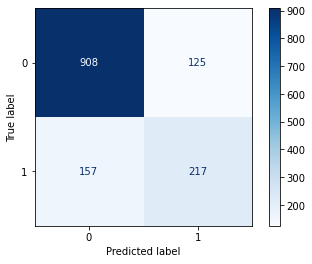

In [323]:
plot_confusion_matrix(ab, X_test_ada, y_test_ada,cmap=plt.cm.Blues)  
plt.show()

### Feature Selection using RFECV

In [324]:
selector = RFECV(ab,
                 step=1,
                 min_features_to_select=5,
                 cv=5)
selector.fit(X_train_ada, y_train_ada)
print(selector.ranking_)
selector.grid_scores_

[1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1]


array([0.80053333, 0.80586667, 0.80231111, 0.8032    , 0.80604444,
       0.80515556, 0.80551111, 0.80551111, 0.80462222, 0.80604444,
       0.80515556, 0.80906667, 0.80995556, 0.80995556])

Display selected features

In [325]:
feature_support = selector.get_support()
ada_feature = X_train_ada.loc[:,feature_support].columns.tolist()
ada_feature

['Senior Citizen',
 'Partner',
 'Dependents',
 'Tenure Months',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Monthly Charges',
 'Total Charges']

In [490]:
X_train_ada=X_train_ada[ada_feature]
X_test_ada=X_test_ada[ada_feature] 
ab.fit(X_train_ada,y_train_ada)

AdaBoostClassifier(learning_rate=0.1, n_estimators=1000, random_state=42)

In [491]:
X_train_ada.shape

(5625, 17)

### Classification report after feature selection

In [494]:
ypred=ab.predict(X_test_ada)
print(classification_report(y_test_ada,ypred,digits=8))

              precision    recall  f1-score   support

           0  0.85258216 0.87899322 0.86558627      1033
           1  0.63450292 0.58021390 0.60614525       374

    accuracy                      0.79957356      1407
   macro avg  0.74354254 0.72960356 0.73586576      1407
weighted avg  0.79461369 0.79957356 0.79662327      1407



Train score and test score after feature selection

In [495]:
print('train score =', ab.score(X_train_ada,y_train_ada))
print('test score =', ab.score(X_test_ada,y_test_ada))

train score = 0.8174222222222223
test score = 0.7995735607675906


### Conclusion :
Removing the feature doesn't afftect the performance of the model.<br>
The train score, test score, accuarcy, recall and the precision remain the same but we did reduce the training Time.<br> 
Less data means the algorithm train faster.

# <font color=purpuple>Logitic Regression </font>

Creating a copy of the train set and test set

In [68]:
X_train_lr,y_train_lr,X_test_lr,y_test_lr = X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()

Searching for the best parameters

In [69]:

param_grid=[{'penalty': ['l1','l2'], 
            'solver' : ['lbfgs', 'liblinear','newton-cg', 'sag', 'saga']}
           ]
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(X_train_lr, y_train_lr)
grid.best_score_

0.8083555555555556

In [70]:
grid.best_params_


{'penalty': 'l1', 'solver': 'saga'}

Creating the model

In [71]:
finalLog=LogisticRegression(penalty='l1',solver= 'saga')
finalLog.fit(X_train_lr, y_train_lr)

LogisticRegression(penalty='l1', solver='saga')

Displaying the train score and the test score 

In [72]:
print('train score=', finalLog.score(X_train_lr,y_train_lr))
print('test score=', finalLog.score(X_test_lr,y_test_lr))

train score= 0.8103111111111111
test score= 0.8052594171997157


### Classification report

In [73]:
ypred =finalLog.predict(X_test_lr)
print(classification_report(y_test_lr, ypred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1033
           1       0.64      0.61      0.62       374

    accuracy                           0.81      1407
   macro avg       0.75      0.74      0.75      1407
weighted avg       0.80      0.81      0.80      1407



### Confusion matrix visualization

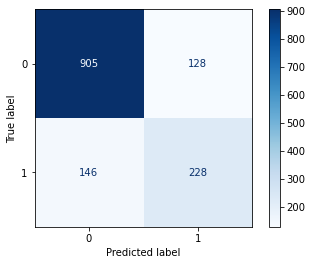

In [74]:
plot_confusion_matrix(finalLog, X_test_lr, y_test_lr,cmap=plt.cm.Blues)  
plt.show()

### Feature Selection using RFECV

In [336]:
selector = RFECV(finalLog,
                 step=1,
                 min_features_to_select=5,
                 cv=10)
selector.fit(X_train_lr, y_train_lr)
selector.grid_scores_


array([0.79609141, 0.79662238, 0.80124555, 0.80213302, 0.80728716,
       0.80640159, 0.80693508, 0.80693318, 0.8069335 , 0.8072881 ,
       0.80764461, 0.80728937, 0.80906557, 0.8092435 ])

In [337]:
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

* All features have the same ranking

Display feature selected

In [338]:
feature_support = selector.get_support()
lr_feature = X_train_lr.loc[:,feature_support].columns.tolist()
lr_feature

['Senior Citizen',
 'Partner',
 'Dependents',
 'Tenure Months',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Monthly Charges',
 'Total Charges']

The new features list is the same we have 18 features so theren't any feature that will help us improve the score

### Conclusion :
According to the result obtained by RFECV any feature selection would decrease the score of the model.
Our model is already using the best 18 features

# <font color=purpuple>KNN</font>


Creating a copy of the train set and test set

In [340]:
X_train_knn,y_train_knn,X_test_knn,y_test_knn = X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()

Searching for the best parameters

In [341]:
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan'],
              'weights' : ['uniform', 'distance']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train_knn, y_train_knn)
print(grid.best_score_)
print(grid.best_params_)
model = grid.best_estimator_
model.score(X_test_knn, y_test_knn)


0.7889777777777777
{'metric': 'manhattan', 'n_neighbors': 18, 'weights': 'uniform'}


0.7725657427149965

In [343]:
knn=KNeighborsClassifier(metric ='manhattan', n_neighbors= 18, weights= 'uniform')
knn.fit(X_train_knn,y_train_knn)

KNeighborsClassifier(metric='manhattan', n_neighbors=18)

### Classification report 

In [344]:
ypred =knn.predict(X_test_knn)
print(classification_report(y_test_knn, ypred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.58      0.53      0.56       374

    accuracy                           0.77      1407
   macro avg       0.71      0.70      0.70      1407
weighted avg       0.77      0.77      0.77      1407



### Confusion matrix visualization

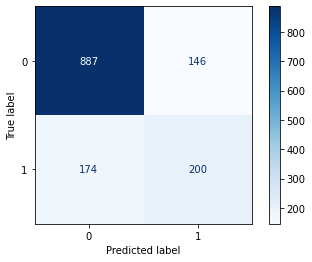

In [345]:
plot_confusion_matrix(knn, X_test_knn, y_test_knn,cmap=plt.cm.Blues)  
plt.show()

In [346]:
new=pd.concat([X_train_knn, y_train_knn],axis=1)

### Feature Selection

#### Correlation Matrix

A correlation matrix is a tabular data representing the ‘correlations’ between pairs of variables in a given data.

Each row and column represents a variable, and each value in this matrix is the correlation coefficient between the variables represented by the corresponding row and column.

The Correlation matrix is an important metric that is computed to summarize data to understand the relationship between various variables and make decisions accordingly.

And we are going to use it to reduce the dimension of our dataset (features selection)

Text(0.5, 1.0, 'Correlation matrix')

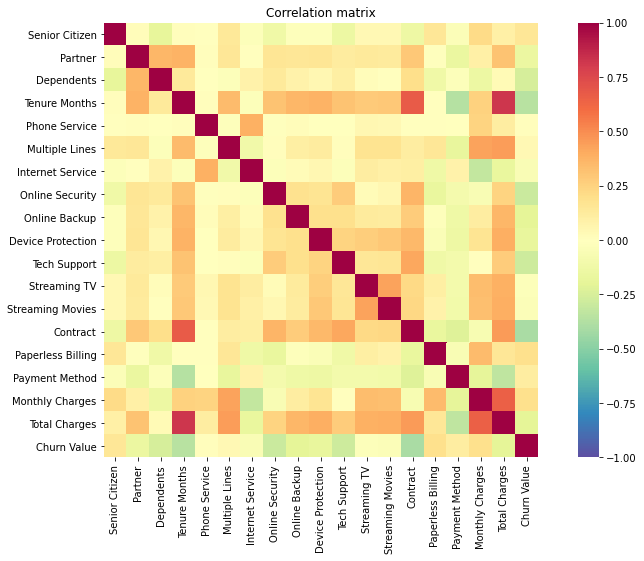

In [347]:
f, ax = plt.subplots(figsize=(14, 8))
corr1= new.corr()


sns.heatmap(corr1,cmap='Spectral_r',  square=True, vmin=-1 ,vmax=1, ax=ax)
plt.title('Correlation matrix')

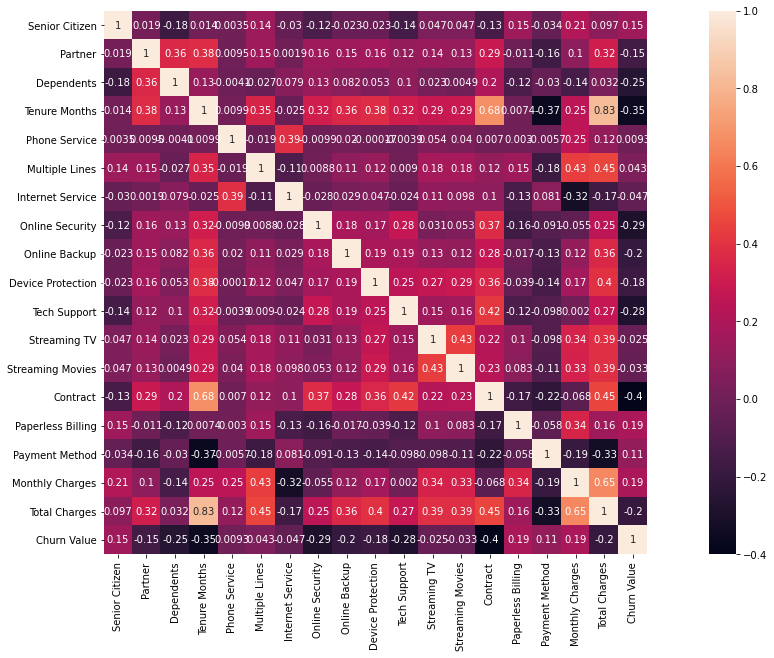

In [348]:
import seaborn as sns

f, ax = plt.subplots(figsize=(22, 10))
corr = new.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            square=True, annot=True, ax=ax)

In [349]:
corr = new.corr()
corr

,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
Senior Citizen,1.000000,0.019028,-0.180432,0.014013,0.003540,0.141540,-0.029871,-0.123781,-0.023071,-0.022693,-0.144611,0.046654,0.046509,-0.134065,0.154628,-0.033978,0.213735,0.096939,0.150970
Partner,0.019028,1.000000,0.363622,0.381717,0.009492,0.149845,0.001869,0.157440,0.149950,0.163133,0.121878,0.137655,0.126893,0.290174,-0.010699,-0.162671,0.101056,0.318680,-0.154306
Dependents,-0.180432,0.363622,1.000000,0.134950,-0.004062,-0.027210,0.079041,0.133821,0.082163,0.052833,0.103806,0.022590,0.004875,0.202529,-0.121244,-0.030284,-0.141556,0.032178,-0.254806
Tenure Months,0.014013,0.381717,0.134950,1.000000,0.009905,0.346069,-0.024787,0.318169,0.364522,0.380285,0.316714,0.286762,0.293167,0.675395,0.007407,-0.366558,0.250410,0.827181,-0.351710
Phone Service,0.003540,0.009492,-0.004062,0.009905,1.000000,-0.019027,0.387511,-0.009918,0.019743,-0.000173,-0.003946,0.053599,0.039597,0.006970,0.003038,-0.005743,0.248752,0.115163,0.009318
Multiple Lines,0.141540,0.149845,-0.027210,0.346069,-0.019027,1.000000,-0.111241,0.008813,0.107877,0.124802,0.008960,0.176312,0.179009,0.115669,0.151021,-0.178739,0.434846,0.453047,0.043010
Internet Service,-0.029871,0.001869,0.079041,-0.024787,0.387511,-0.111241,1.000000,-0.027911,0.029210,0.047065,-0.024059,0.110842,0.098251,0.102242,-0.131251,0.081388,-0.319196,-0.169673,-0.047040
Online Security,-0.123781,0.157440,0.133821,0.318169,-0.009918,0.008813,-0.027911,1.000000,0.180468,0.170020,0.276386,0.030852,0.053455,0.371281,-0.164190,-0.090730,-0.055029,0.245858,-0.292746
Online Backup,-0.023071,0.149950,0.082163,0.364522,0.019743,0.107877,0.029210,0.180468,1.000000,0.188087,0.188892,0.129081,0.118886,0.276963,-0.016916,-0.126197,0.115365,0.364988,-0.198804
Device Protection,-0.022693,0.163133,0.052833,0.380285,-0.000173,0.124802,0.047065,0.170020,0.188087,1.000000,0.248731,0.271669,0.293366,0.355023,-0.039070,-0.135275,0.166645,0.395603,-0.175113


We are going to use the last row of our dataset which represent the target and we will try to filter out those feature whose correlation coefficient value with the target are greater than a threshold that we will determine later.

In [350]:
C=corr.tail(1)

In [351]:
listdict=C.to_dict('records')  
listdict

[{'Senior Citizen': 0.15097039728821265,
  'Partner': -0.15430560731487805,
  'Dependents': -0.25480588305136015,
  'Tenure Months': -0.35171034796320616,
  'Phone Service': 0.009317875813021981,
  'Multiple Lines': 0.043009578029858254,
  'Internet Service': -0.04703967153360885,
  'Online Security': -0.2927457943696293,
  'Online Backup': -0.19880431804479504,
  'Device Protection': -0.17511273303279448,
  'Tech Support': -0.28189715564151474,
  'Streaming TV': -0.02502607567840797,
  'Streaming Movies': -0.03307370457150001,
  'Contract': -0.40049985049271764,
  'Paperless Billing': 0.18851307741751464,
  'Payment Method': 0.11460356175897708,
  'Monthly Charges': 0.19345549558480668,
  'Total Charges': -0.19798760358157422,
  'Churn Value': 1.0}]

In [352]:
for l in listdict:
    l.pop('Churn Value')

In [353]:
listdict

[{'Senior Citizen': 0.15097039728821265,
  'Partner': -0.15430560731487805,
  'Dependents': -0.25480588305136015,
  'Tenure Months': -0.35171034796320616,
  'Phone Service': 0.009317875813021981,
  'Multiple Lines': 0.043009578029858254,
  'Internet Service': -0.04703967153360885,
  'Online Security': -0.2927457943696293,
  'Online Backup': -0.19880431804479504,
  'Device Protection': -0.17511273303279448,
  'Tech Support': -0.28189715564151474,
  'Streaming TV': -0.02502607567840797,
  'Streaming Movies': -0.03307370457150001,
  'Contract': -0.40049985049271764,
  'Paperless Billing': 0.18851307741751464,
  'Payment Method': 0.11460356175897708,
  'Monthly Charges': 0.19345549558480668,
  'Total Charges': -0.19798760358157422}]

In a range of [0,1] we will increase the threshold with 0.01 and we will compare it with the corrolation coffecient of each feature and to finally show the train score and test score using those thresholds.

In [354]:
LbestTr=[]
LbestTest=[]
d={}
d2={}
for seuil in np.arange(0,1,0.01):
    Ll=[]
    
    for l in listdict:
        for k,v in l.items():
            if abs(v)  >seuil:  
                Ll.append(k)
                
                Xtr=X_train[Ll]
                Xt=X_test[Ll]
               
                knn.fit(Xtr,y_train_knn)
    print('train score=', knn.score(Xtr,y_train_knn))
    print('test score=', knn.score(Xt,y_test_knn))
            
    print('seuil ', seuil,'\n')
    print('L ', Ll,'\n',len(Ll))

    
    
    LbestTr.append(knn.score(Xtr,y_train_knn))
   
    LbestTest.append(knn.score(Xt,y_test_knn))
    
    #d={seuil: Lbest}
    #d={seuil:knn.score(Xtr,y_train_knn)}
    d.update({seuil:knn.score(Xtr,y_train_knn)})
    d2.update({seuil:knn.score(Xt,y_test_knn)})
   

train score= 0.8133333333333334
test score= 0.7725657427149965
seuil  0.0 

L  ['Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges'] 
 18
train score= 0.8140444444444445
test score= 0.7697228144989339
seuil  0.01 

L  ['Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges'] 
 17
train score= 0.8140444444444445
test score= 0.7697228144989339
seuil  0.02 

L  ['Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device P

In [355]:
max(LbestTest)

0.7810945273631841

In [356]:
max(LbestTr)

0.8263111111111111

In [357]:
# threshold for max train
max(d, key=d.get)

0.18

In [358]:
# threshold for max test
max(d2, key=d2.get)

0.04

We will choose the best threshold that gave us the max test score value, which is equal to 0.04.

The new 16 features are :<br>

Senior Citizen, Partner, Dependents, Tenure Months, Multiple Lines, Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Streaming Movies, Contract, Paperless Billing, Payment Method, Monthly Charges, Total Charges

Train score= 0.8167111111111112<br>
Test score= 0.7810945273631841

Down below, Best_f is a list that countains the features with hight corrlation coefficient (features with corrolation coefficient > 0.04)

In [359]:
Best_f=['Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges']
X_train_knn=X_train_knn[Best_f]
X_test_knn=X_test_knn[Best_f]

In [360]:
X_test_knn.shape

(1407, 16)

In [363]:
X_train_knn.shape

(5625, 16)

In [364]:
knn.fit(X_train_knn,y_train_knn)

KNeighborsClassifier(metric='manhattan', n_neighbors=18)

### Classification report after feature selection

In [365]:
ypred =knn.predict(X_test_knn)
print(classification_report(y_test_knn, ypred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1033
           1       0.60      0.53      0.56       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



###  Conclusion :
After the feature selection using correlation the performance of our model has improved.<br>
we have a better train score, test score, accuarcy and recall

# <font color=purpuple>Tree Decision</font>

Creating a copy of the train set and test set

In [465]:
X_train_td,y_train_td,X_test_td,y_test_td = X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()

Searching for the best parameters

In [466]:
param_grid = {'criterion': ['gini', 'entropy'],'max_depth': np.arange(1,10)}
grid=GridSearchCV( DecisionTreeClassifier(random_state=0),param_grid,cv=5)
grid.fit(X_train_td, y_train_td)
grid.best_params_

{'criterion': 'gini', 'max_depth': 5}

Display the best score

In [467]:
grid.best_score_

0.7911111111111111

Creating the model

In [468]:
final_dtrees=DecisionTreeClassifier(criterion='gini', max_depth= 5)
final_dtrees.fit(X_train_td, y_train_td)

DecisionTreeClassifier(max_depth=5)

Displaying the train score and the test score 

In [469]:
print('train score=', final_dtrees.score(X_train_td,y_train_td))
print('test score=', final_dtrees.score(X_test_td,y_test_td))

train score= 0.808
test score= 0.7711442786069652


### Classification report

In [470]:
ypred =final_dtrees.predict(X_test_td)
print(classification_report(y_test_td, ypred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1033
           1       0.56      0.62      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.72      1407
weighted avg       0.78      0.77      0.77      1407



### Confusion matrix visualization

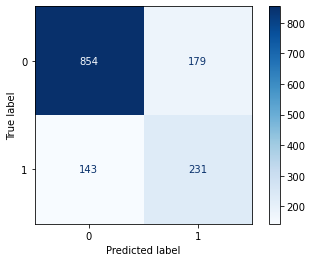

In [471]:
plot_confusion_matrix(final_dtrees, X_test_td, y_test_td,cmap=plt.cm.Blues)  
plt.show()

### Features importance visualization

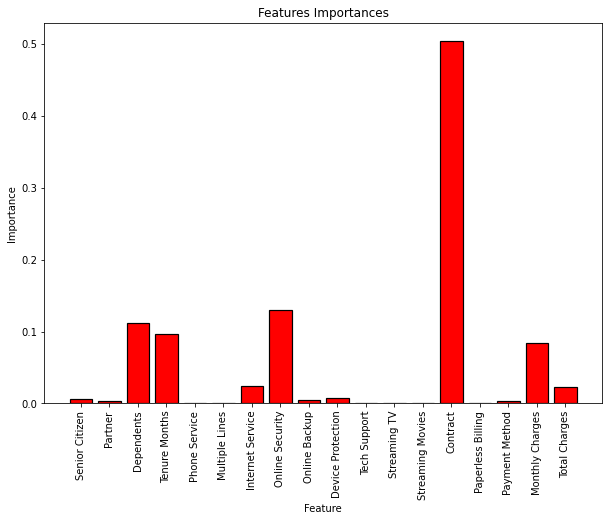

In [472]:
plt.figure(figsize=(10,7))
feature_list=X_train_td.columns
importances = list(final_dtrees.feature_importances_)
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances');

* Contract has the highest importance 
* Dependents, Tenure Months, Online Security, Monthly Charges have has an average importance
* Senior Citizen, Partner, Online Backup, Internet Service, Device Protection, Payment Method, Total Charges have a very low importance
* the rest of features are not important we can remove them


### Feature selection 

#### Select From Model 
Meta-transformer for selecting features based on importance weights.

In [473]:
trans = SelectFromModel(final_dtrees, threshold='median')
trans.fit_transform(X_train_td, y_train_td)
feature_support = trans.get_support()
td_feature = X_train_td.loc[:,feature_support].columns.tolist()


Feature Selected using Select From Model

In [474]:
td_feature

['Senior Citizen',
 'Dependents',
 'Tenure Months',
 'Internet Service',
 'Online Security',
 'Device Protection',
 'Contract',
 'Monthly Charges',
 'Total Charges']

In [475]:
print("We started with {0} features but retained only {1} of them!".format(X_train_td.shape[1], len(td_feature)))

We started with 18 features but retained only 9 of them!


In [476]:
X_train_td = X_train_td[td_feature]
X_test_td = X_test_td[td_feature]
final_dtrees.fit(X_train_td, y_train_td)

DecisionTreeClassifier(max_depth=5)

Displaying the train score and the test score after feature selection

In [477]:
print('train score=', final_dtrees.score(X_train_td,y_train_td))
print('test score=', final_dtrees.score(X_test_td,y_test_td))


train score= 0.8083555555555556
test score= 0.7711442786069652


### Classification report

In [478]:
ypred =final_dtrees.predict(X_test_td)
print(classification_report(y_test_td, ypred))


              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1033
           1       0.56      0.63      0.59       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.72      1407
weighted avg       0.78      0.77      0.77      1407



In [479]:
X_train_td.shape

(5625, 9)

### Conclusion :
Using the Select from Model selector we were able to reduce the number of features from 18 to 9 and the recall has a bit improved 

# <font color=purpuple>Random Forest</font>

Creating a copy of the train set and test set

In [500]:
X_train_rf,y_train_rf,X_test_rf,y_test_rf = X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()

In [481]:
param_grid = {'criterion': ['gini', 'entropy'],'max_depth': np.arange(1,15)}
grid=GridSearchCV( RandomForestClassifier(),param_grid,cv=5)
grid.fit(X_train_rf,y_train_rf)
grid.best_score_
grid.best_params_

{'criterion': 'gini', 'max_depth': 8}

Display the best score

In [482]:
grid.best_score_

0.8115555555555556

Displaying the train score and the test score 

In [501]:
rf = RandomForestClassifier(criterion= 'gini', max_depth= 8)
rf.fit(X_train_rf, y_train_rf)
print('train score=', rf.score(X_train_rf,y_train_rf))
print('test score=', rf.score(X_test_rf,y_test_rf))

train score= 0.8456888888888889
test score= 0.7995735607675906


### Classification report

In [502]:
ypred_rf=rf.predict(X_test_rf)
print(classification_report(y_test_rf,ypred_rf,digits=8))

              precision    recall  f1-score   support

           0  0.84481175 0.89060987 0.86710650      1033
           1  0.64465409 0.54812834 0.59248555       374

    accuracy                      0.79957356      1407
   macro avg  0.74473292 0.71936911 0.72979603      1407
weighted avg  0.79160709 0.79957356 0.79410847      1407



### Confusion matrix visualization

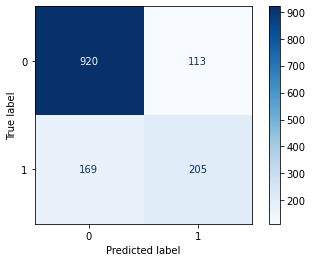

In [503]:
plot_confusion_matrix(rf, X_test_rf, y_test_rf,cmap=plt.cm.Blues)  
plt.show()

### Features importance visualization

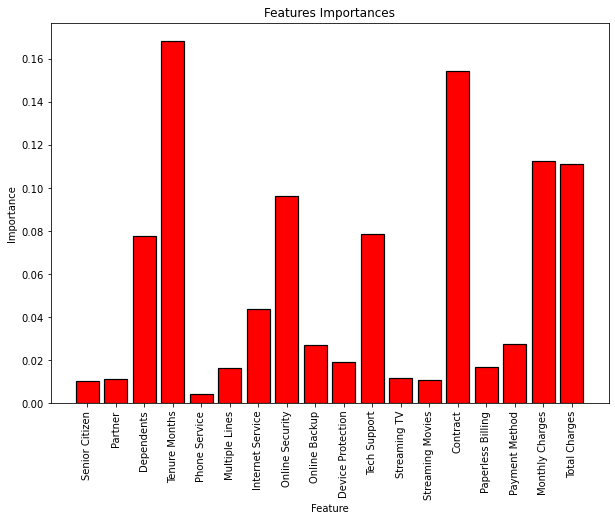

In [504]:
plt.figure(figsize=(10,7))
feature_list=X_train_rf.columns
importances = list(rf.feature_importances_)
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances');

Phone Service has the least importance 

### Feature Selection using RFECV

In [505]:
selector = RFECV(rf,
                 step=1,
                 min_features_to_select=5,
                 cv=5)
selector.fit(X_train_rf, y_train_rf)
print(selector.ranking_)
selector.grid_scores_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


array([0.79715556, 0.79697778, 0.80373333, 0.79946667, 0.80106667,
       0.80195556, 0.80266667, 0.80426667, 0.80604444, 0.80746667,
       0.80462222, 0.80746667, 0.80835556, 0.80888889])

In [507]:
feature_rf = selector .get_support()
rf_feature = X_train_rf.loc[:,feature_rf].columns.tolist()
print('Selected features :')
print(rf_feature)
print('The number of features selected : ', len(rf_feature))

Selected features :
['Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges']
The number of features selected :  18


### Conclusion :
Based on the result obtained by RFECV we can conclude that any feature selection would decrease the performance of the model.
This model is already using the best features

# <font color=purpuple>Naive Baies </font>

Creating a copy of the train set and test set

In [721]:
X_train_nb,y_train_nb,X_test_nb,y_test_nb = X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()

Searching for the best parameters

In [722]:
nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB()}
scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X_train_nb, y_train_nb, cv=5, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.7692444444444444, 'bernoulli': 0.7671111111111111}

Creating the model and displaying the train score and the test score 

In [723]:
model=GaussianNB()
model.fit(X_train_nb,y_train_nb)
print('train score=', model.score(X_train_nb,y_train_nb))
print('test score=', model.score(X_test_nb,y_test_nb))

train score= 0.7708444444444444
test score= 0.7427149964463398


### Classification report

In [724]:
ypred = model.predict(X_test_nb)
print(classification_report(y_test_nb, ypred))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1033
           1       0.51      0.74      0.60       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.74      0.75      1407



### Confusion matrix visualization

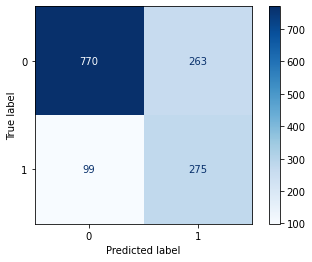

In [725]:
plot_confusion_matrix(model, X_test_nb, y_test_nb,cmap=plt.cm.Blues)  
plt.show()

### Feature Selection with sbfs

The floating variants, SBFS, can be considered as extensions to the simpler SBS algorithms. The floating algorithms have an additional exclusion or inclusion step to remove features once they were included (or excluded), so that a larger number of feature subset combinations can be sampled.

In [640]:
sbfs = SFS(model, 
          k_features=1, 
           forward=False, 
           floating=True, 
           verbose=2,
           scoring='accuracy',
           cv=5,
           n_jobs=-1)

sbfs = sbfs.fit(X_train_nb, y_train_nb)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    2.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    2.1s finished

[2021-01-02 20:26:47] Features: 17/1 -- score: 0.7727999999999999[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2021-01-02 20:26:48] Features: 16/1 -- score: 0.7749333333333333[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend 

In [641]:
pd.DataFrame.from_dict(sbfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
18,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.7688888888888888, 0.784, 0.7724444444444445...",0.769244,"(Senior Citizen, Partner, Dependents, Tenure M...",0.0128162,0.00997142,0.00498571
17,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.7706666666666667, 0.7893333333333333, 0.783...",0.7728,"(Senior Citizen, Dependents, Tenure Months, Ph...",0.0162955,0.0126784,0.00633922
16,"(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[0.7733333333333333, 0.7866666666666666, 0.785...",0.774933,"(Dependents, Tenure Months, Phone Service, Mul...",0.0127508,0.00992057,0.00496029
15,"(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 1...","[0.7733333333333333, 0.7875555555555556, 0.787...",0.775289,"(Dependents, Tenure Months, Phone Service, Mul...",0.0139813,0.0108779,0.00543895
14,"(2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17)","[0.7724444444444445, 0.7902222222222223, 0.788...",0.776178,"(Dependents, Tenure Months, Phone Service, Int...",0.0148153,0.0115268,0.0057634
13,"(0, 2, 3, 4, 5, 6, 7, 9, 10, 14, 15, 16, 17)","[0.7786666666666666, 0.7902222222222223, 0.787...",0.780622,"(Senior Citizen, Dependents, Tenure Months, Ph...",0.01118,0.0086984,0.0043492
12,"(0, 2, 3, 4, 5, 7, 9, 10, 14, 15, 16, 17)","[0.7786666666666666, 0.7955555555555556, 0.784...",0.780444,"(Senior Citizen, Dependents, Tenure Months, Ph...",0.0140854,0.010959,0.00547948
11,"(0, 2, 3, 4, 7, 9, 10, 14, 15, 16, 17)","[0.7804444444444445, 0.7928888888888889, 0.784...",0.7792,"(Senior Citizen, Dependents, Tenure Months, Ph...",0.0138537,0.0107787,0.00538934
10,"(0, 2, 3, 7, 9, 10, 14, 15, 16, 17)","[0.7795555555555556, 0.7928888888888889, 0.784...",0.778844,"(Senior Citizen, Dependents, Tenure Months, On...",0.0134871,0.0104934,0.0052467
9,"(2, 3, 5, 7, 9, 10, 14, 15, 16)","[0.7804444444444445, 0.7911111111111111, 0.776...",0.779378,"(Dependents, Tenure Months, Multiple Lines, On...",0.00886141,0.00689448,0.00344724


In [642]:
print('\nSFS 1 :')
print(sbfs.k_feature_idx_)
print('CV Score:')
print(sbfs.k_score_)
print('CV Score:')
print(sbfs.k_feature_names_)


SFS 1 :
(16,)
CV Score:
0.7342222222222222
CV Score:
('Monthly Charges',)


In [643]:
sbfs = SFS(model, 
          k_features=2, 
           forward=False, 
           floating=True, 
           verbose=2,
           scoring='accuracy',
           cv=5,
           n_jobs=-1)

sbfs = sbfs.fit(X_train_nb, y_train_nb)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.0s finished

[2021-01-02 20:26:51] Features: 17/2 -- score: 0.7727999999999999[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2021-01-02 20:26:51] Features: 16/2 -- score: 0.7749333333333333[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend 

In [644]:
pd.DataFrame.from_dict(sbfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
18,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.7688888888888888, 0.784, 0.7724444444444445...",0.769244,"(Senior Citizen, Partner, Dependents, Tenure M...",0.0128162,0.00997142,0.00498571
17,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.7706666666666667, 0.7893333333333333, 0.783...",0.7728,"(Senior Citizen, Dependents, Tenure Months, Ph...",0.0162955,0.0126784,0.00633922
16,"(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[0.7733333333333333, 0.7866666666666666, 0.785...",0.774933,"(Dependents, Tenure Months, Phone Service, Mul...",0.0127508,0.00992057,0.00496029
15,"(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 1...","[0.7733333333333333, 0.7875555555555556, 0.787...",0.775289,"(Dependents, Tenure Months, Phone Service, Mul...",0.0139813,0.0108779,0.00543895
14,"(2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17)","[0.7724444444444445, 0.7902222222222223, 0.788...",0.776178,"(Dependents, Tenure Months, Phone Service, Int...",0.0148153,0.0115268,0.0057634
13,"(0, 2, 3, 4, 5, 6, 7, 9, 10, 14, 15, 16, 17)","[0.7786666666666666, 0.7902222222222223, 0.787...",0.780622,"(Senior Citizen, Dependents, Tenure Months, Ph...",0.01118,0.0086984,0.0043492
12,"(0, 2, 3, 4, 5, 7, 9, 10, 14, 15, 16, 17)","[0.7786666666666666, 0.7955555555555556, 0.784...",0.780444,"(Senior Citizen, Dependents, Tenure Months, Ph...",0.0140854,0.010959,0.00547948
11,"(0, 2, 3, 4, 7, 9, 10, 14, 15, 16, 17)","[0.7804444444444445, 0.7928888888888889, 0.784...",0.7792,"(Senior Citizen, Dependents, Tenure Months, Ph...",0.0138537,0.0107787,0.00538934
10,"(0, 2, 3, 7, 9, 10, 14, 15, 16, 17)","[0.7795555555555556, 0.7928888888888889, 0.784...",0.778844,"(Senior Citizen, Dependents, Tenure Months, On...",0.0134871,0.0104934,0.0052467
9,"(2, 3, 5, 7, 9, 10, 14, 15, 16)","[0.7804444444444445, 0.7911111111111111, 0.776...",0.779378,"(Dependents, Tenure Months, Multiple Lines, On...",0.00886141,0.00689448,0.00344724


In [645]:
print('\nSFS 2 :')
print(sbfs.k_feature_idx_)
print('CV Score:')
print(sbfs.k_score_)
print('CV Score:')
print(sbfs.k_feature_names_)


SFS 2 :
(3, 16)
CV Score:
0.7856000000000001
CV Score:
('Tenure Months', 'Monthly Charges')


In [646]:
sbfs = SFS(model, 
          k_features=3, 
           forward=False, 
           floating=True, 
           verbose=2,
           scoring='accuracy',
           cv=5,
           n_jobs=-1)

sbfs = sbfs.fit(X_train_nb, y_train_nb)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.0s finished

[2021-01-02 20:26:55] Features: 17/3 -- score: 0.7727999999999999[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2021-01-02 20:26:55] Features: 16/3 -- score: 0.7749333333333333[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend 

In [647]:
pd.DataFrame.from_dict(sbfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
18,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.7688888888888888, 0.784, 0.7724444444444445...",0.769244,"(Senior Citizen, Partner, Dependents, Tenure M...",0.0128162,0.00997142,0.00498571
17,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.7706666666666667, 0.7893333333333333, 0.783...",0.7728,"(Senior Citizen, Dependents, Tenure Months, Ph...",0.0162955,0.0126784,0.00633922
16,"(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[0.7733333333333333, 0.7866666666666666, 0.785...",0.774933,"(Dependents, Tenure Months, Phone Service, Mul...",0.0127508,0.00992057,0.00496029
15,"(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 1...","[0.7733333333333333, 0.7875555555555556, 0.787...",0.775289,"(Dependents, Tenure Months, Phone Service, Mul...",0.0139813,0.0108779,0.00543895
14,"(2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17)","[0.7724444444444445, 0.7902222222222223, 0.788...",0.776178,"(Dependents, Tenure Months, Phone Service, Int...",0.0148153,0.0115268,0.0057634
13,"(0, 2, 3, 4, 5, 6, 7, 9, 10, 14, 15, 16, 17)","[0.7786666666666666, 0.7902222222222223, 0.787...",0.780622,"(Senior Citizen, Dependents, Tenure Months, Ph...",0.01118,0.0086984,0.0043492
12,"(0, 2, 3, 4, 5, 7, 9, 10, 14, 15, 16, 17)","[0.7786666666666666, 0.7955555555555556, 0.784...",0.780444,"(Senior Citizen, Dependents, Tenure Months, Ph...",0.0140854,0.010959,0.00547948
11,"(0, 2, 3, 4, 7, 9, 10, 14, 15, 16, 17)","[0.7804444444444445, 0.7928888888888889, 0.784...",0.7792,"(Senior Citizen, Dependents, Tenure Months, Ph...",0.0138537,0.0107787,0.00538934
10,"(0, 2, 3, 7, 9, 10, 14, 15, 16, 17)","[0.7795555555555556, 0.7928888888888889, 0.784...",0.778844,"(Senior Citizen, Dependents, Tenure Months, On...",0.0134871,0.0104934,0.0052467
9,"(2, 3, 5, 7, 9, 10, 14, 15, 16)","[0.7804444444444445, 0.7911111111111111, 0.776...",0.779378,"(Dependents, Tenure Months, Multiple Lines, On...",0.00886141,0.00689448,0.00344724


In [648]:
print('\nSFS 3 :')
print(sbfs.k_feature_idx_)
print('CV Score:')
print(sbfs.k_score_)
print('CV Score:')
print(sbfs.k_feature_names_)


SFS 3 :
(3, 5, 16)
CV Score:
0.7889777777777779
CV Score:
('Tenure Months', 'Multiple Lines', 'Monthly Charges')


In [649]:
sbfs = SFS(model, 
          k_features=4, 
           forward=False, 
           floating=True, 
           verbose=2,
           scoring='accuracy',
           cv=5,
           n_jobs=-1)

sbfs = sbfs.fit(X_train_nb, y_train_nb)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.0s finished

[2021-01-02 20:26:58] Features: 17/4 -- score: 0.7727999999999999[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  17 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2021-01-02 20:26:59] Features: 16/4 -- score: 0.7749333333333333[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  16 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend 

In [650]:
pd.DataFrame.from_dict(sbfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
18,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.7688888888888888, 0.784, 0.7724444444444445...",0.769244,"(Senior Citizen, Partner, Dependents, Tenure M...",0.0128162,0.00997142,0.00498571
17,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.7706666666666667, 0.7893333333333333, 0.783...",0.7728,"(Senior Citizen, Dependents, Tenure Months, Ph...",0.0162955,0.0126784,0.00633922
16,"(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[0.7733333333333333, 0.7866666666666666, 0.785...",0.774933,"(Dependents, Tenure Months, Phone Service, Mul...",0.0127508,0.00992057,0.00496029
15,"(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 1...","[0.7733333333333333, 0.7875555555555556, 0.787...",0.775289,"(Dependents, Tenure Months, Phone Service, Mul...",0.0139813,0.0108779,0.00543895
14,"(2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17)","[0.7724444444444445, 0.7902222222222223, 0.788...",0.776178,"(Dependents, Tenure Months, Phone Service, Int...",0.0148153,0.0115268,0.0057634
13,"(0, 2, 3, 4, 5, 6, 7, 9, 10, 14, 15, 16, 17)","[0.7786666666666666, 0.7902222222222223, 0.787...",0.780622,"(Senior Citizen, Dependents, Tenure Months, Ph...",0.01118,0.0086984,0.0043492
12,"(0, 2, 3, 4, 5, 7, 9, 10, 14, 15, 16, 17)","[0.7786666666666666, 0.7955555555555556, 0.784...",0.780444,"(Senior Citizen, Dependents, Tenure Months, Ph...",0.0140854,0.010959,0.00547948
11,"(0, 2, 3, 4, 7, 9, 10, 14, 15, 16, 17)","[0.7804444444444445, 0.7928888888888889, 0.784...",0.7792,"(Senior Citizen, Dependents, Tenure Months, Ph...",0.0138537,0.0107787,0.00538934
10,"(0, 2, 3, 7, 9, 10, 14, 15, 16, 17)","[0.7795555555555556, 0.7928888888888889, 0.784...",0.778844,"(Senior Citizen, Dependents, Tenure Months, On...",0.0134871,0.0104934,0.0052467
9,"(2, 3, 5, 7, 9, 10, 14, 15, 16)","[0.7804444444444445, 0.7911111111111111, 0.776...",0.779378,"(Dependents, Tenure Months, Multiple Lines, On...",0.00886141,0.00689448,0.00344724


In [651]:
print('\nSFS 4 :')
print(sbfs.k_feature_idx_)
print('CV Score:')
print(sbfs.k_score_)
print('CV Score:')
print(sbfs.k_feature_names_)


SFS 4 :
(3, 7, 14, 16)
CV Score:
0.7713777777777777
CV Score:
('Tenure Months', 'Online Security', 'Paperless Billing', 'Monthly Charges')


We can notice that the score increase from 1 to 3 features but it decrease when we use 4 features.

So we will choose the model with 3 features : Tenure Months, Multiple Lines, Monthly Charges

In [652]:
X_train_nb2=X_train_nb[['Tenure Months', 'Multiple Lines', 'Monthly Charges']].copy()
X_test_nb2=X_test_nb[['Tenure Months', 'Multiple Lines', 'Monthly Charges']].copy()

model2=GaussianNB()
model2 = model2.fit(X_train_nb2, y_train_nb)

print('train score ')
print('Befor', model.score(X_train_nb,y_train_nb),'  After:', model2.score(X_train_nb2,y_train_nb))
print('test score ')
print('Befor :', model.score(X_test_nb,y_test_nb),'  After: ',model2.score(X_test_nb2,y_test_nb))



train score 
Befor 0.7708444444444444   After: 0.7904
test score 
Befor : 0.7427149964463398   After:  0.7768301350390903


### Classification report after feature selection

In [653]:
ypred_nb = model2.predict(X_test_nb2)
print(classification_report(y_test_nb, ypred_nb))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1033
           1       0.63      0.39      0.48       374

    accuracy                           0.78      1407
   macro avg       0.72      0.65      0.67      1407
weighted avg       0.76      0.78      0.76      1407



### Conclusion

After the feature selection the train score and test score, the accuarcy and the recall for value 0 has improved 
yet the precision and the recall for value 1 has decreased too much fwhich is problematic and affect the performance of our model
so we will not use this selection of features

# <font color=purpuple>Standard SVM</font>

Creating a copy of the train set and test set

In [704]:
X_train_svm,y_train_svm,X_test_svm,y_test_svm = X_train.copy(),y_train.copy(),X_test.copy(),y_test.copy()

Searching for the best parameters

In [535]:
param_range =[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_grid = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}


grid = GridSearchCV(SVC(), param_grid, cv=5)

grid.fit(X_train_svm, y_train_svm)



GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

Display the best score

In [536]:
grid.best_score_

0.8044444444444444

Display best parameters

In [537]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

Creating the model and displaying the train score and the test score 

In [705]:
svm =SVC(C= 100, gamma= 0.01, kernel= 'rbf')
svm.fit(X_test_svm, y_test_svm)
print('train score=', svm.score(X_train_svm,y_train_svm))
print('test score=', svm.score(X_test_svm,y_test_svm))

train score= 0.7976888888888889
test score= 0.8251599147121536


### Classification report

In [706]:
ypred=svm.predict(X_test_svm)
print(classification_report(y_test_svm,ypred,digits=8))

              precision    recall  f1-score   support

           0  0.86267281 0.90609874 0.88385269      1033
           1  0.69875776 0.60160428 0.64655172       374

    accuracy                      0.82515991      1407
   macro avg  0.78071529 0.75385151 0.76520221      1407
weighted avg  0.81910193 0.82515991 0.82077482      1407



### Confusion matrix visualization

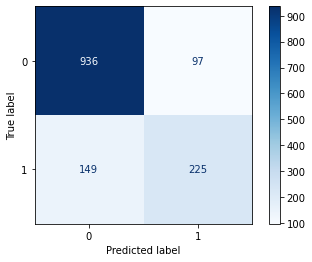

In [707]:
plot_confusion_matrix(svm, X_test_svm, y_test_svm,cmap=plt.cm.Blues)  
plt.show()

### Features Selection using Variance Threshold

In [708]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(0.95*(1-.95))
varsel=selector.fit(X_train_svm)
features=X_train_svm.loc[:, varsel.get_support()].columns.tolist()
print(features)

['Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges']


In [709]:
print('We started by ',X_train_svm.shape[1],' features and we selected ',len(features),' features')

We started by  18  features and we selected  18  features


### Conclusion :
Our model is already using the best features<br>
The feature selection won't help improving the score of the model

# <font color=red>Comparing the performance of the models </font>

### Train score and Test Score for each model

In [726]:
# Compare Algorithms

models = []
models.append(('Gradient Boost', final_Gbc, X_train_Gboost, y_train_Gboost, X_test_Gboost, y_test_Gboost))
models.append(('xgBoost', xgboost, X_train_xgb, y_train_xgb, X_test_xgb, y_test_xgb))
models.append(('Ada Boost', ab, X_train_ada, y_train_ada, X_test_ada, y_test_ada))
models.append(('Logistic Regression', finalLog, X_train_lr, y_train_lr, X_test_lr, y_test_lr))
models.append(('KNN', knn, X_train_knn, y_train_knn, X_test_knn, y_test_knn ))
models.append(('Decision Tree', final_dtrees , X_train_td ,y_train_td ,X_test_td, y_test_td ))
models.append(('Random Forest', rf, X_train_rf, y_train_rf, X_test_rf, y_test_rf))
models.append(('Gaussian NB', model, X_train_nb, y_train_nb, X_test_nb, y_test_nb))
models.append(('SVM', svm, X_train_svm, y_train_svm, X_test_svm, y_test_svm))

# evaluate each model in turn
train_scores = []
test_scores = []
names = []
ypreds = []
f1_scores = []
aucs = []
precisions = []
recalls = []

scoring = 'accuracy'
for name, mod, x_train, y_train, x_test, y_test in models:
    ypred=mod.predict(x_test)
    ypreds.append(ypred)
    precisions.append(precision_score(y_test, ypred))
    recalls.append(recall_score(y_test, ypred))
    f1_scores.append(f1_score(ypred, y_test))
    test_scores.append(mod.score(x_test,y_test))
    train_scores.append(mod.score(x_train,y_train))
    names.append(name)
 

In [727]:
train_df= pd.DataFrame({'Algorithms':names, 'Train Score':train_scores, 'Test Score':test_scores, 'Recall':recalls,
                        'Precision':precisions,'F1_score':f1_scores})
train_df

,Algorithms,Train Score,Test Score,Recall,Precision,F1_score
0,Gradient Boost,0.825244,0.808813,0.574866,0.661538,0.615165
1,xgBoost,0.825067,0.797441,0.548128,0.638629,0.589928
2,Ada Boost,0.817422,0.799574,0.580214,0.634503,0.606145
3,Logistic Regression,0.810133,0.805259,0.609626,0.640449,0.624658
4,KNN,0.815111,0.780384,0.534759,0.597015,0.564175
5,Decision Tree,0.808356,0.771144,0.625668,0.562500,0.592405
6,Random Forest,0.845689,0.799574,0.548128,0.644654,0.592486
7,Gaussian NB,0.770844,0.742715,0.735294,0.511152,0.603070
8,SVM,0.797689,0.825160,0.601604,0.698758,0.646552
